<a href="https://colab.research.google.com/github/Marielena-GS/aprendizaje-automatico-252601/blob/main/4_1_Medidas_de_Similitud_Marielena_Gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [3]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [4]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [5]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [6]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

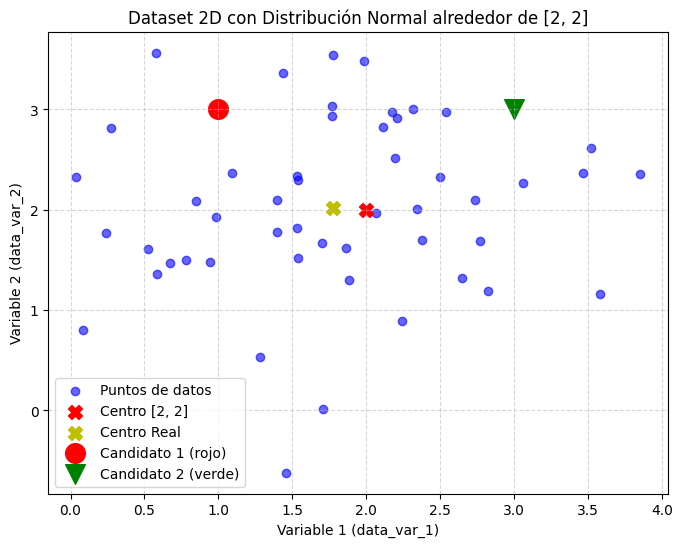

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


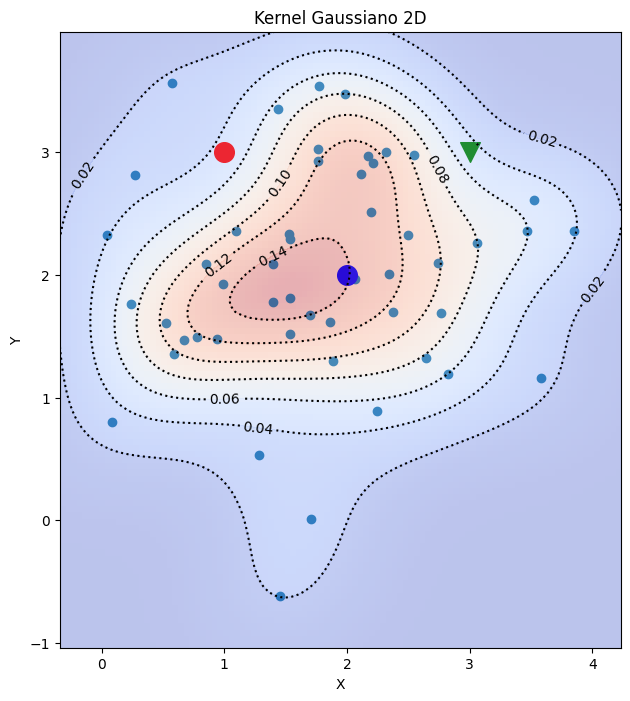

In [7]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

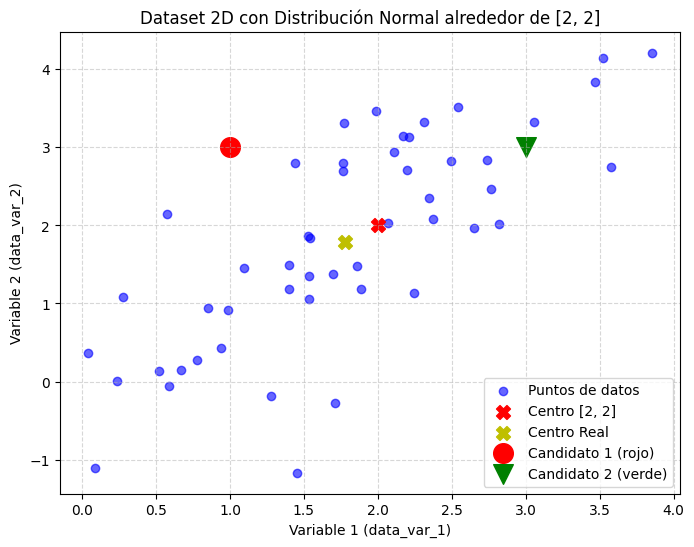

Centro real del cluster: x=1.77, y=1.79
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


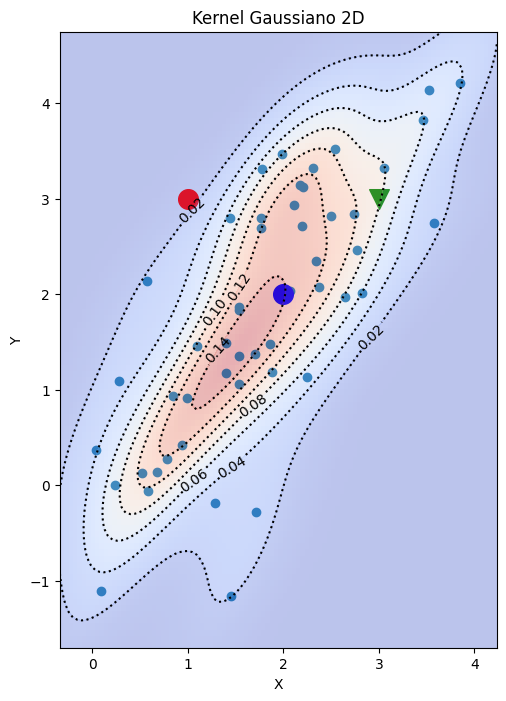

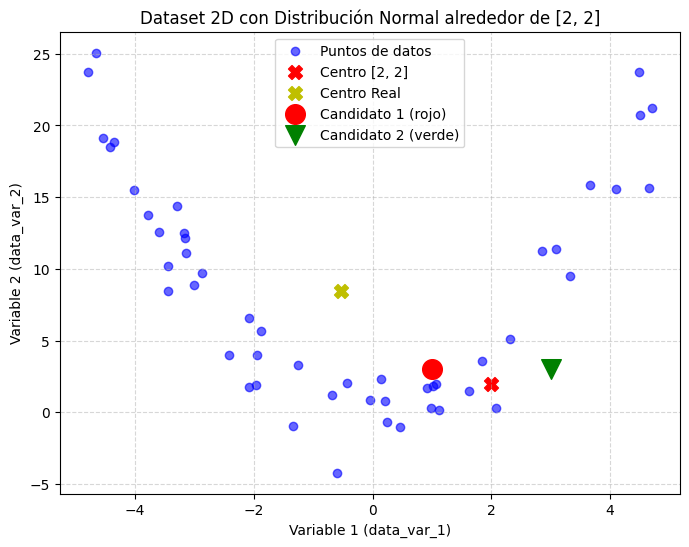

Centro real del cluster: x=-0.54, y=8.46
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


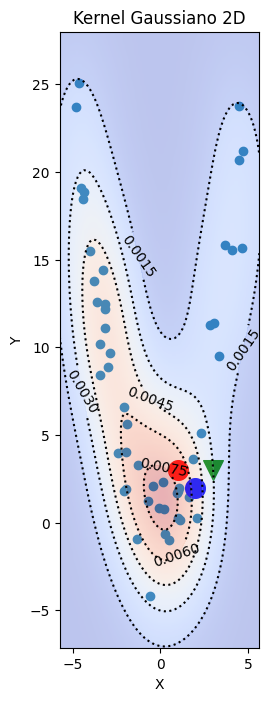

In [8]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal(n_data_points=50, ds_center=ds_center)
visualize_scatter(dxr, dyr, ds_center, c1, c2)
visualize_dataset(dxr, dyr, ds_center, c1, c2)

dx2, dy2 = cargar_datasetRelacionCuadratica(n_data_points=50)
visualize_scatter(dx2, dy2, ds_center, c1, c2)
visualize_dataset(dx2, dy2, ds_center, c1, c2)

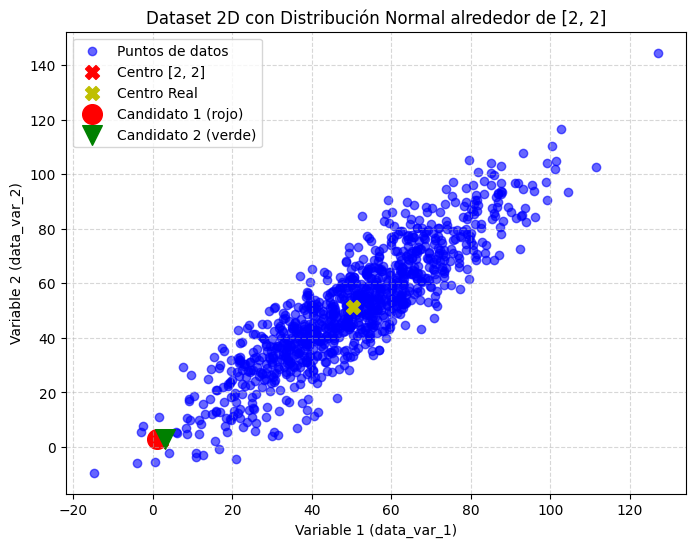

Centro real del cluster: x=50.39, y=51.10
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


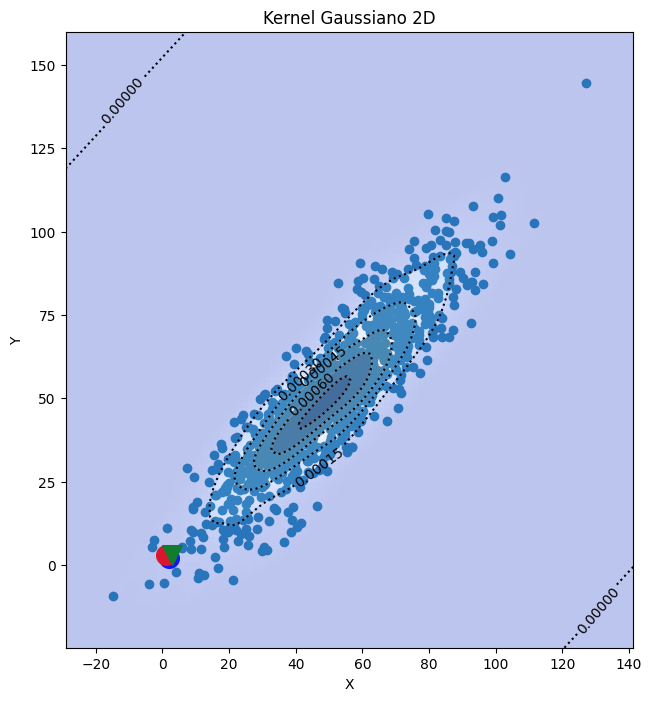

In [9]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])
# Visualizar el dataset grande
visualize_scatter(dxGrande, dyGrande, ds_center, c1, c2)
visualize_dataset(dxGrande, dyGrande, ds_center, c1, c2)

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [10]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov
print(f'Covarianza dataset con distribución normal:\n{np.cov(dx, dy)}\n')

print(f'Covarianza dataset con relación lineal :\n{np.cov(dxr, dyr)}\n')


print(f'Covarianza dataset con relación lineal Grande:\n{np.cov(dxGrande, dyGrande)}\n')


print(f'Covarianza dataset con relación cuadratica:\n{np.cov(dx2, dy2)}\n')


Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]

Covarianza dataset con relación lineal :
[[0.87173739 0.96159229]
 [0.96159229 1.81589137]]

Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]

Covarianza dataset con relación cuadratica:
[[ 8.34535038 -2.48409573]
 [-2.48409573 60.72673368]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

- El dataset dxGrande, dyGrande (Covarianza: 375.65) muestra la mayor dependencia lineal entre sus dos variables. Aunque dxr, dyr (Covarianza: 0.96) también tiene una fuerte dependencia lineal, el valor mucho mayor de la covarianza en dxGrande, dyGrande indica una relación más intensa en su escala.

¿Cual es el problema que tiene la covarianza?

- El principal problema de la covarianza es que su valor depende de la escala de las variables. Es decir, un valor alto de covarianza no necesariamente significa una relación lineal más fuerte; podría ser simplemente porque las variables involucradas tienen valores absolutos grandes. Esto hace que sea difícil comparar la fuerza de la relación lineal entre diferentes pares de variables o datasets, ya que no está estandarizada ni normalizada. Por ejemplo, una covarianza de 100 puede ser muy significativa para un par de variables con valores pequeños, pero trivial para otras con valores muy grandes. Esto se resuelve con el coeficiente de correlación de Pearson, que sí es una medida normalizada

In [11]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef
print(f'Correlación de Pearson dataset con distribución normal:\n{np.corrcoef(dx, dy)}\n')

print(f'Correlación de Pearson dataset con relación lineal :\n{np.corrcoef(dxr, dyr)}\n')

print(f'Correlación de Pearson dataset con relación lineal Grande:\n{np.corrcoef(dxGrande, dyGrande)}\n')

Correlación de Pearson dataset con distribución normal:
[[1.         0.11007179]
 [0.11007179 1.        ]]

Correlación de Pearson dataset con relación lineal :
[[1.         0.76428124]
 [0.76428124 1.        ]]

Correlación de Pearson dataset con relación lineal Grande:
[[1.         0.88736636]
 [0.88736636 1.        ]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

- El dataset dxGrande, dyGrande tiene la mayor dependencia lineal entre sus dos variables, con un coeficiente de correlación de Pearson de 0.88736636. Este valor está más cercano a 1, indicando una relación lineal directa muy fuerte.

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

- El coeficiente de correlación de Pearson es mucho más fácil de interpretar para identificar la dependencia lineal entre dos variables. A diferencia de la covarianza, el coeficiente de Pearson está normalizado y siempre varía entre -1 y 1. Esto permite una interpretación directa:

- Valores cercanos a 1 indican una fuerte relación lineal positiva.
- Valores cercanos a -1 indican una fuerte relación lineal negativa.
- Valores cercanos a 0 indican una relación lineal débil o nula. Esta estandarización elimina el problema de la escala que afecta a la covarianza, facilitando la comparación de la fuerza de la relación lineal entre diferentes pares de variables o datasets.

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [ ]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [12]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=2)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist}')
   return dist

In [13]:
def distancia_manhattan(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=1)
   print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist}')
   return dist

In [15]:
import scipy.spatial.distance

def distancia_chebyshev(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=np.inf)
    print(f'Distancia chebyshev del punto {p1} al punto {p2} = {dist}')
    return dist

def similitud_coseno(p1, p2):
    # Cosine distance is 1 - Cosine Similarity, which represents dissimilarity
    dist = scipy.spatial.distance.cosine(p1, p2)
    print(f'Similitud de coseno del punto {p1} al punto {p2} = {1-dist} (Distancia de Coseno = {dist})')
    return dist # Returning cosine distance as a dissimilarity measure

def distancia_mahalanobis(p1, p2, VI):
    dist = scipy.spatial.distance.mahalanobis(p1, p2, VI)
    print(f'Distancia mahalanobis del punto {p1} al punto {p2} = {dist}')
    return dist

def distancia_jaccard(p1, p2):
    dist = scipy.spatial.distance.jaccard(p1, p2)
    print(f'Distancia jaccard del punto {p1} al punto {p2} = {dist}')
    return dist

In [16]:
# Ejecutar funciones
print("🔍 calculando las distancias de los puntos candidatos al centro")

# --- Primer dataset (dx, dy) ---
print('\nDistancias primer dataset (dx, dy):\n')
ds_center_1 = np.array([np.mean(dx), np.mean(dy)])
print(f'Centro del dataset (dx, dy): {ds_center_1}')

# Calculo de la matriz de covarianza y su inversa para Mahalanobis
cov_1 = np.cov(dx, dy)
VI_1 = np.linalg.inv(cov_1)

print('\nPunto c1 al centro del dataset (dx, dy):')
distancia_euclidiana(c1, ds_center_1)
distancia_manhattan(c1, ds_center_1)
distancia_chebyshev(c1, ds_center_1)
similitud_coseno(c1, ds_center_1)
distancia_mahalanobis(c1, ds_center_1, VI_1)
# La distancia de Jaccard no es directamente aplicable a puntos continuos en este contexto.

print('\nPunto c2 al centro del dataset (dx, dy):')
distancia_euclidiana(c2, ds_center_1)
distancia_manhattan(c2, ds_center_1)
distancia_chebyshev(c2, ds_center_1)
similitud_coseno(c2, ds_center_1)
distancia_mahalanobis(c2, ds_center_1, VI_1)

# --- Segundo dataset (dxr, dyr) ---
print('\nDistancias segundo dataset (dxr, dyr):\n')
ds_center_2 = np.array([np.mean(dxr), np.mean(dyr)])
print(f'Centro del dataset (dxr, dyr): {ds_center_2}')

cov_2 = np.cov(dxr, dyr)
VI_2 = np.linalg.inv(cov_2)

print('\nPunto c1 al centro del dataset (dxr, dyr):')
distancia_euclidiana(c1, ds_center_2)
distancia_manhattan(c1, ds_center_2)
distancia_chebyshev(c1, ds_center_2)
similitud_coseno(c1, ds_center_2)
distancia_mahalanobis(c1, ds_center_2, VI_2)

print('\nPunto c2 al centro del dataset (dxr, dyr):')
distancia_euclidiana(c2, ds_center_2)
distancia_manhattan(c2, ds_center_2)
distancia_chebyshev(c2, ds_center_2)
similitud_coseno(c2, ds_center_2)
distancia_mahalanobis(c2, ds_center_2, VI_2)

# --- Tercer dataset (dx2, dy2) ---
print('\nDistancias tercer dataset (dx2, dy2):\n')
ds_center_3 = np.array([np.mean(dx2), np.mean(dy2)])
print(f'Centro del dataset (dx2, dy2): {ds_center_3}')

cov_3 = np.cov(dx2, dy2)
VI_3 = np.linalg.inv(cov_3)

print('\nPunto c1 al centro del dataset (dx2, dy2):')
distancia_euclidiana(c1, ds_center_3)
distancia_manhattan(c1, ds_center_3)
distancia_chebyshev(c1, ds_center_3)
similitud_coseno(c1, ds_center_3)
distancia_mahalanobis(c1, ds_center_3, VI_3)

print('\nPunto c2 al centro del dataset (dx2, dy2):')
distancia_euclidiana(c2, ds_center_3)
distancia_manhattan(c2, ds_center_3)
distancia_chebyshev(c2, ds_center_3)
similitud_coseno(c2, ds_center_3)
distancia_mahalanobis(c2, ds_center_3, VI_3)

# --- Cuarto dataset (dxGrande, dyGrande) ---
print('\nDistancias cuarto dataset (dxGrande, dyGrande):\n')
ds_center_4 = np.array([np.mean(dxGrande), np.mean(dyGrande)])
print(f'Centro del dataset (dxGrande, dyGrande): {ds_center_4}')

cov_4 = np.cov(dxGrande, dyGrande)
VI_4 = np.linalg.inv(cov_4)

print('\nPunto c1 al centro del dataset (dxGrande, dyGrande):')
distancia_euclidiana(c1, ds_center_4)
distancia_manhattan(c1, ds_center_4)
distancia_chebyshev(c1, ds_center_4)
similitud_coseno(c1, ds_center_4)
distancia_mahalanobis(c1, ds_center_4, VI_4)

print('\nPunto c2 al centro del dataset (dxGrande, dyGrande):')
distancia_euclidiana(c2, ds_center_4)
distancia_manhattan(c2, ds_center_4)
distancia_chebyshev(c2, ds_center_4)
similitud_coseno(c2, ds_center_4)
distancia_mahalanobis(c2, ds_center_4, VI_4)

🔍 calculando las distancias de los puntos candidatos al centro

Distancias primer dataset (dx, dy):

Centro del dataset (dx, dy): [1.77452609 2.01778087]

Punto c1 al centro del dataset (dx, dy):
Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.2508577416548483
Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072
Distancia chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822191295320475
Similitud de coseno del punto [1 3] al punto [1.77452609 2.01778087] = 0.9212201531060055 (Distancia de Coseno = 0.07877984689399453)
Distancia mahalanobis del punto [1 3] al punto [1.77452609 2.01778087] = 1.4770847358703076

Punto c2 al centro del dataset (dx, dy):
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 1.5705224324671165
Distancia manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188
Distancia chebyshev del punto [3 3] al punto [1.77452609 2.01778087] = 1.225473905256

np.float64(2.4255099406397824)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?

- Las siguientes medidas de disimilitud son intrínsecamente de un punto a otro punto:

- Distancia Euclidiana (L2): Mide la distancia en línea recta entre dos puntos en un espacio euclidiano.
- Distancia Manhattan (L1): Mide la suma de las diferencias absolutas de sus coordenadas, como la distancia que se recorrería en una cuadrícula.
- Distancia Chebyshev (L∞): Mide la máxima diferencia entre las coordenadas de los puntos.
- Similitud de Coseno (o Distancia de Coseno): Mide el ángulo entre dos vectores, lo que indica su orientación relativa en el espacio. Aunque se expresa como similitud, su complemento (1-similitud) es una distancia entre dos puntos (vectores).
- Distancia de Jaccard: Generalmente se usa para comparar la similitud/disimilitud entre dos conjuntos o vectores binarios, lo que puede considerarse una medida punto a punto para ese tipo de datos.

¿Qué medidas de disimilitud son de un punto a una distribución?

- Distancia de Mahalanobis: Esta es la medida más relevante aquí. Calcula la distancia entre un punto y el centro (media) de una distribución de datos, teniendo en cuenta la covarianza de la distribución. Esto significa que ajusta la distancia según la forma y orientación de la nube de puntos, dando menos peso a las direcciones donde los puntos están más dispersos y más peso a donde están más agrupados. En el código, la calculamos entre un punto candidato y el centro de la distribución del dataset, usando la matriz de covarianza de ese dataset.

¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

- Sí, la principal ventaja de la Distancia de Mahalanobis es que precisamente tiene en cuenta la distribución real de los datos a través de la matriz de covarianza. A diferencia de las distancias euclidiana o Manhattan, que asumen que las variables no están correlacionadas y tienen la misma varianza (o que la distribución es esférica), la distancia de Mahalanobis se ajusta a la escala de cada variable y a las correlaciones entre ellas. Esto la hace muy útil para identificar valores atípicos o para agrupar datos en distribuciones elípticas o de otras formas no esféricas.

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [17]:
import itertools as it
#  TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for i, j in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[i, j] = distancia(X[i], X[j], mC)
        else:
            mD[i, j] = distancia(X[i], X[j])
    return mD

In [21]:
# ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets y use la medida de disimilitud euclidiana y mahalanobis

# --- Dataset 1: (dx, dy) ---
X1 = np.column_stack((dx, dy))
# calculamos primero la matriz de covarianzas
cov1 = np.cov(X1, rowvar=False)
VI1 = np.linalg.inv(cov1)

print('Calculando Matriz de distancias Euclidiana para (dx, dy)...')
Ma_euclidea1 = matriz_distancias(X1, distancia_euclidiana)
print('Primeros 5x5 elementos de la Matriz Euclidiana (dx, dy):\n', Ma_euclidea1[:5, :5])

print('\nCalculando Matriz de distancias Mahalanobis para (dx, dy)...')
Ma_mahalanobis1 = matriz_distancias(X1, distancia_mahalanobis, VI1)
print('Primeros 5x5 elementos de la Matriz Mahalanobis (dx, dy):\n', Ma_mahalanobis1[:5, :5])

# --- Dataset 2: (dxr, dyr) ---
X2 = np.column_stack((dxr, dyr))
# calculamos primero la matriz de covarianzas
cov2 = np.cov(X2, rowvar=False)
VI2 = np.linalg.inv(cov2)

print('\nCalculando Matriz de distancias Euclidiana para (dxr, dyr)...')
Ma_euclidea2 = matriz_distancias(X2, distancia_euclidiana)
print('Primeros 5x5 elementos de la Matriz Euclidiana (dxr, dyr):\n', Ma_euclidea2[:5, :5])

print('\nCalculando Matriz de distancias Mahalanobis para (dxr, dyr)...')
Ma_mahalanobis2 = matriz_distancias(X2, distancia_mahalanobis, VI2)
print('Primeros 5x5 elementos de la Matriz Mahalanobis (dxr, dyr):\n', Ma_mahalanobis2[:5, :5])

# --- Dataset 3: (dx2, dy2) ---
X3 = np.column_stack((dx2, dy2))
# calculamos primero la matriz de covarianzas
cov3 = np.cov(X3, rowvar=False)
VI3 = np.linalg.inv(cov3)

print('\nCalculando Matriz de distancias Euclidiana para (dx2, dy2)...')
Ma_euclidea3 = matriz_distancias(X3, distancia_euclidiana)
print('Primeros 5x5 elementos de la Matriz Euclidiana (dx2, dy2):\n', Ma_euclidea3[:5, :5])

print('\nCalculando Matriz de distancias Mahalanobis para (dx2, dy2)...')
Ma_mahalanobis3 = matriz_distancias(X3, distancia_mahalanobis, VI3)
print('Primeros 5x5 elementos de la Matriz Mahalanobis (dx2, dy2):\n', Ma_mahalanobis3[:5, :5])

# --- Dataset 4: (dxGrande, dyGrande) ---
X4 = np.column_stack((dxGrande, dyGrande))
# calculamos primero la matriz de covarianzas
cov4 = np.cov(X4, rowvar=False)
VI4 = np.linalg.inv(cov4)

print('\nCalculando Matriz de distancias Euclidiana para (dxGrande, dyGrande)...')
Ma_euclidea4 = matriz_distancias(X4, distancia_euclidiana)
print('Primeros 5x5 elementos de la Matriz Euclidiana (dxGrande, dyGrande):\n', Ma_euclidea4[:5, :5])

print('\nCalculando Matriz de distancias Mahalanobis para (dxGrande, dyGrande)...')
Ma_mahalanobis4 = matriz_distancias(X4, distancia_mahalanobis, VI4)
print('Primeros 5x5 elementos de la Matriz Mahalanobis (dxGrande, dyGrande):\n', Ma_mahalanobis4[:5, :5])

# Define Ma_euclidea and Ma_mahalanobis for plotting in the next cells (using the first dataset as example)
Ma_euclidea = Ma_euclidea1
Ma_mahalanobis = Ma_mahalanobis1

Se han truncado las últimas 5000 líneas del flujo de salida.
Distancia mahalanobis del punto [44.37799414 55.07949653] al punto [81.58425631 90.53618851] = 1.9023624746762087
Distancia mahalanobis del punto [44.37799414 55.07949653] al punto [65.34869458 71.7004126 ] = 1.1406834714337366
Distancia mahalanobis del punto [44.37799414 55.07949653] al punto [40.61051228 51.10603943] = 0.19446402028165605
Distancia mahalanobis del punto [44.37799414 55.07949653] al punto [60.85120087 55.49884876] = 1.7871152460703132
Distancia mahalanobis del punto [44.37799414 55.07949653] al punto [40.73164614 53.9055868 ] = 0.3041867821135551
Distancia mahalanobis del punto [44.37799414 55.07949653] al punto [40.68540493 42.66140098] = 0.9030193542560824
Distancia mahalanobis del punto [44.37799414 55.07949653] al punto [54.83924543 75.59185416] = 1.1603584140264993
Distancia mahalanobis del punto [44.37799414 55.07949653] al punto [11.73439511  4.84251693] = 2.4772881048644657
Distancia mahalanobis del 

Text(0.5, 1.0, 'Mahalanobis')

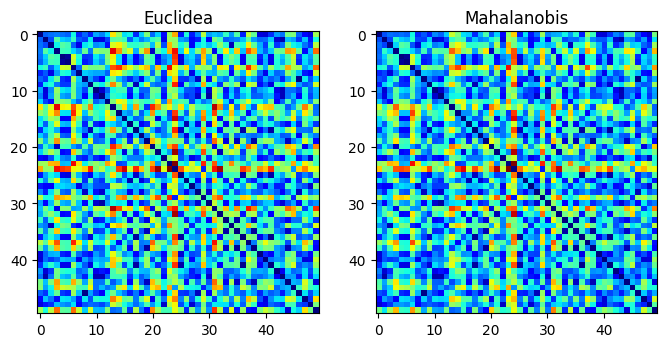

In [22]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [23]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)
    # complete
    max_dist = np.max(mD)
    if max_dist == 0: # Handle case where all distances are 0
        mS = np.ones_like(mD)
    else:
        mS = 1 - (mD / max_dist)
    return mS

Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 0.9519004187135587
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.0123271291088105
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.0658486127228506
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.0168072296719541
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 0.9501739362700208
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 1.5890480537201892
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.6887335415445033
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9662152128101167
Distancia euclidiana del punto [2.

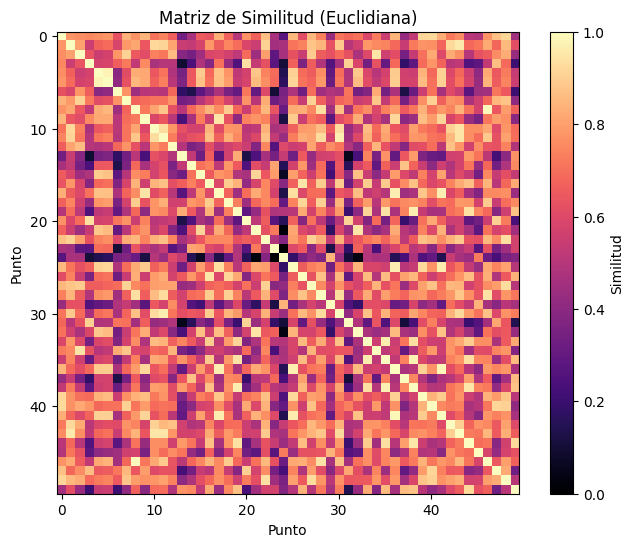

In [24]:
# Complete 4.3 Grafique la matriz de similitud

# Usamos el primer dataset (X1) y la distancia euclidiana para calcular la matriz de similitud
Ma_similitud_euclidea = matriz_similitud(X1, distancia_euclidiana)

plt.figure(figsize=(8, 6))
plt.imshow(Ma_similitud_euclidea, cmap='magma') # Usando un mapa de color diferente para similitud
plt.title('Matriz de Similitud (Euclidiana)')
plt.xlabel('Punto')
plt.ylabel('Punto')
plt.colorbar(label='Similitud')
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

- Generalmente, el gráfico de matriz de similitud es más fácil de interpretar la razón principal es la siguiente: En una matriz de similitud, los valores más altos indican una mayor semejanza o una relación más fuerte entre los puntos. Esto es intuitivo: "más" (valor alto) significa "más similar".

- Relación directa: Cuando se busca agrupar elementos o identificar relaciones cercanas, es más directo ver los puntos con alta similitud resaltados. En una matriz de disimilitud (distancia), los valores más bajos (colores más fríos o menos intensos) son los que indican una mayor semejanza, lo cual puede requerir un pequeño cambio de perspectiva en la interpretación visual.

SEGUN MIS RESULTADOS

- El gráfico de la medida de similitud es más fácil de interpretar. En la matriz de similitud (Euclidiana) se observa claramente:

- La diagonal principal bien definida, donde la similitud es máxima (cada punto consigo mismo). Colores más claros que indican mayor parecido entre puntos, lo cual es intuitivo.

- Los patrones visuales (zonas claras y oscuras) permiten identificar rápidamente qué puntos son más similares entre sí.

En cambio, en los gráficos de disimilitud (Euclidea y Mahalanobis):

- Los colores representan distancias, lo que obliga a interpretar que valores más altos significan menor relación, aunque son correctos matemáticamente, no son tan inmediatos visualmente como la similitud.

En este caso la matriz de similitud es más clara y comprensible visualmente que la matriz de disimilitud.


# 🚀 ¡TALLER FINALIZADO!"